# Visualização de Dados com Pandas, Matplotlib e Seaborn

Este notebook apresenta diferentes tipos de gráficos e suas aplicações, utilizando as bibliotecas `pandas`, `matplotlib.pyplot` e `seaborn`. Cada gráfico é apresentado com explicações sobre quando é útil, qual função utilizamos e quais os principais argumentos.
Note que a intenção deste material não é fornecer uma listagem exaustiva de tipos de gráficos e de códigos para formatá-los; ao contrário, pretende-se prover um material para discussão e consulta rápida.

## Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os dados e fazendo uma inspeção inicial
Usaremos o dataset `tips` do Seaborn, que traz informações sobre contas e gorjetas em um restaurante.

In [2]:
dados = sns.load_dataset("tips")
print(dados.head(5))
print(dados.info())
print(dados.describe())
print(dados.describe(include='category'))

# Mostrar todas as linhas do DataFrame
pd.set_option('display.max_rows', None)

# Mostrar todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Exibir o DataFrame completo
print(dados)  # ou apenas: dados

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672


In [29]:
# Tipo de dados: category versus object #
# Ontem nossas variáveis qualitativas importadas do Excel vieram como object. Podemos convertê-las em category 
# Exemplo:
# dados['Sexo'] = dados['Sexo'].astype('category')
# Tipo category:
## Ideal para colunas com número limitado de valores repetidos (ex: sexo, turno, estado).
## Mais rápido para filtros, agrupamentos e ordenações.
## Pode ser ordenado (explicitamente, não apenas alfabeticamente, pode exemplo) ou não.

In [3]:
# Mostrar todas as linhas
pd.set_option('display.max_rows', None)

# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Exibir o DataFrame completo
print(dados)  # ou apenas: dados

# Cuidado: se a base tiver milhares de linhas, isso pode deixar o notebook lento ou travar!

     total_bill    tip     sex smoker   day    time  size
0         16.99   1.01  Female     No   Sun  Dinner     2
1         10.34   1.66    Male     No   Sun  Dinner     3
2         21.01   3.50    Male     No   Sun  Dinner     3
3         23.68   3.31    Male     No   Sun  Dinner     2
4         24.59   3.61  Female     No   Sun  Dinner     4
5         25.29   4.71    Male     No   Sun  Dinner     4
6          8.77   2.00    Male     No   Sun  Dinner     2
7         26.88   3.12    Male     No   Sun  Dinner     4
8         15.04   1.96    Male     No   Sun  Dinner     2
9         14.78   3.23    Male     No   Sun  Dinner     2
10        10.27   1.71    Male     No   Sun  Dinner     2
11        35.26   5.00  Female     No   Sun  Dinner     4
12        15.42   1.57    Male     No   Sun  Dinner     2
13        18.43   3.00    Male     No   Sun  Dinner     4
14        14.83   3.02  Female     No   Sun  Dinner     2
15        21.58   3.92    Male     No   Sun  Dinner     2
16        10.3

## Gráfico de Barras (Barplot)

**Quando usar:** comparar médias entre categorias.

**Função:** `sns.barplot`

**Argumentos principais:**
- `x`: variável categórica (ex.: dia da semana)
- `y`: variável numérica (ex.: total da conta)
- `data`: fonte dos dados

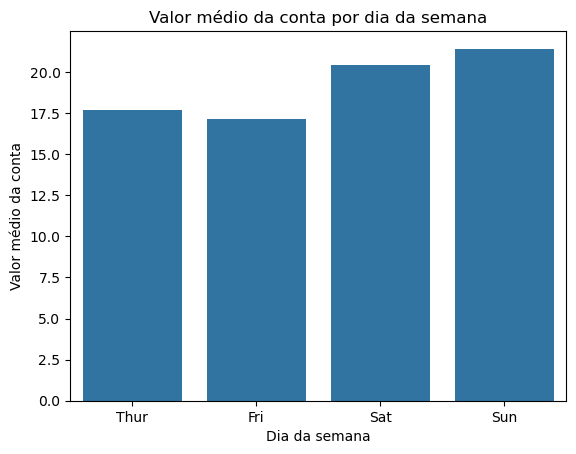

In [37]:
sns.barplot(x="day", y="total_bill", data=dados, errorbar=None) # errorbar = intervalo de confiança para a média
plt.title("Valor médio da conta por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Valor médio da conta")
plt.show()

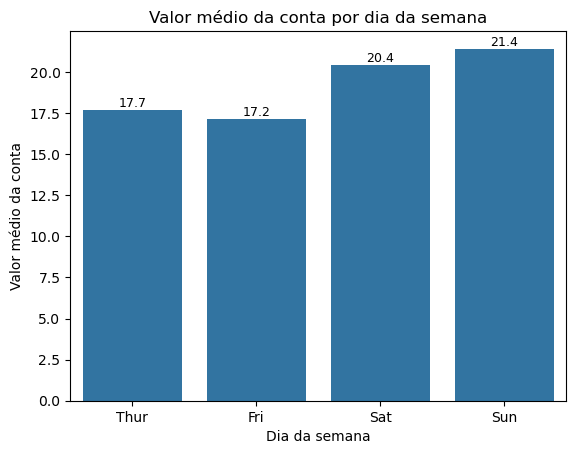

In [45]:
# Gráfico com rótulos
ax = sns.barplot(x="day", y="total_bill", data=dados, errorbar = None)

# Adicionando rótulos nas barras
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura:.1f}',                   
                (p.get_x() + p.get_width() / 2, altura),  # posição (x, y)
                ha='center', va='bottom', fontsize=9)  # diversos de estilo

# Título e eixos
plt.title("Valor médio da conta por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Valor médio da conta")
plt.show()

# Observações
# p	: Refere-se a cada barra (patch) do gráfico
# p.get_x() : É a coordenada x da base esquerda da respectiva barra
# p.get_width() : É a largura da barra
# p.get_x() + p.get_width() / 2 : Posição horizontal central da barra (para o texto ficar centralizado)
# altura : É a altura da barra, obtida com p.get_height() (posição y para o texto)

## Gráfico de Contagem (Countplot)

**Quando usar:** contar a frequência de categorias.

**Função:** `sns.countplot`

**Argumentos:**
- `x`: variável categórica
- `data`: base de dados

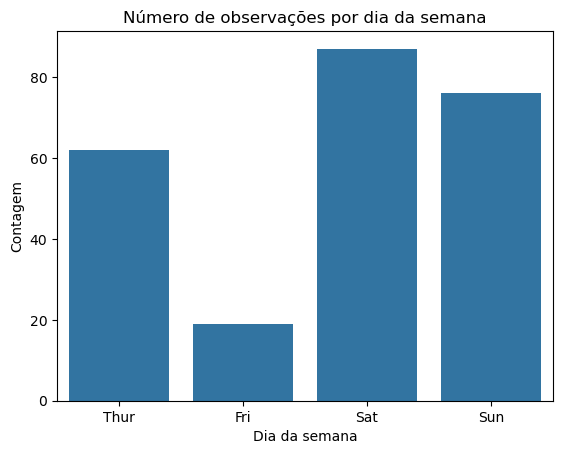

In [47]:
sns.countplot(x="day", data=dados)
plt.title("Número de observações por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Contagem")
plt.show()

## Gráfico de Dispersão (Scatterplot)

**Quando usar:** visualizar a relação entre duas variáveis numéricas.

**Função:** `sns.scatterplot`

**Argumentos:**
- `x`, `y`: variáveis numéricas
- `data`: base de dados

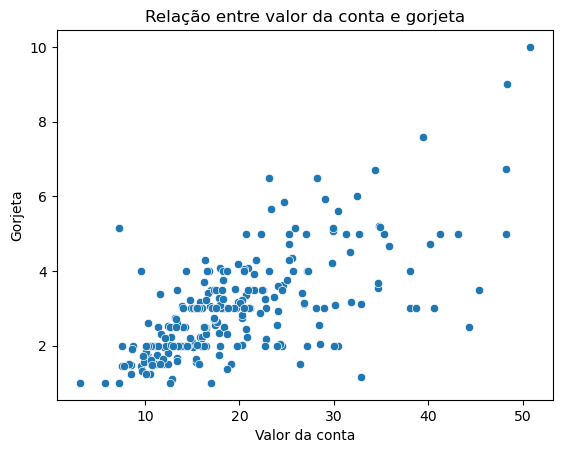

In [50]:
sns.scatterplot(x="total_bill", y="tip", data=dados)
plt.title("Relação entre valor da conta e gorjeta")
plt.xlabel("Valor da conta")
plt.ylabel("Gorjeta")
plt.show()

## Boxplot

**Quando usar:** visualizar a distribuição e presença de outliers por grupo. Comparar distribuições por grupo. 

**Função:** `sns.boxplot`

**Argumentos:**
- `x`: categoria
- `y`: variável numérica
- `data`: base de dados

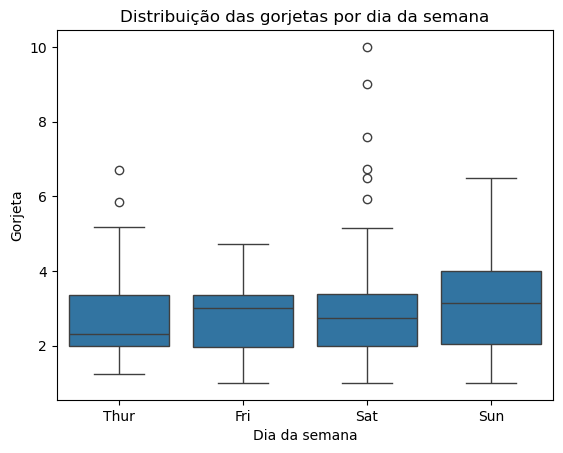

In [53]:
sns.boxplot(x="day", y="tip", data=dados)
plt.title("Distribuição das gorjetas por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Gorjeta")
plt.show()

## Histograma

**Quando usar:** observar a distribuição de uma variável numérica.

**Função:** `sns.histplot`

**Argumentos:**
- `x`: variável numérica
- `bins`: número de intervalos
- `kde`: exibir linha de densidade

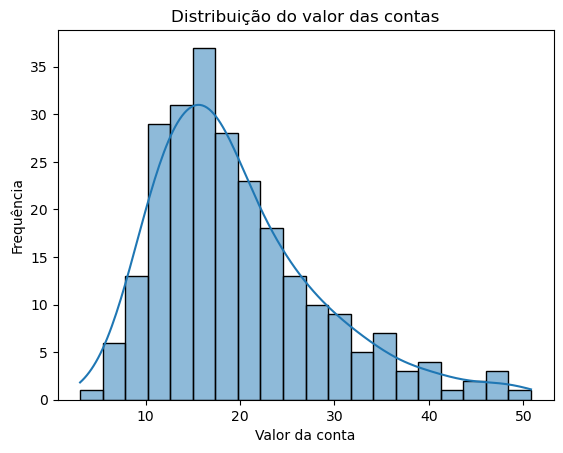

In [56]:
sns.histplot(x="total_bill", data=dados, bins=20, kde=True)
plt.title("Distribuição do valor das contas")
plt.xlabel("Valor da conta")
plt.ylabel("Frequência")
plt.show()

## Heatmap (Mapa de Calor de Correlações)

**Quando usar:** visualizar relações (correlações) entre variáveis numéricas.

**Função:** `sns.heatmap`

**Argumentos:**
- `data`: matriz de correlação
- `annot`: mostra os valores
- `cmap`: esquema de cores

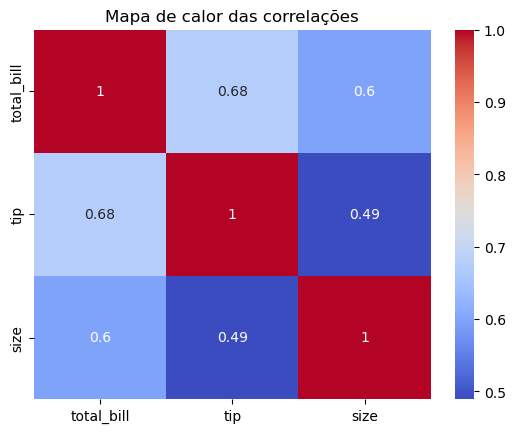

In [59]:
corr = dados.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Mapa de calor das correlações")
plt.show()

## Gráfico de Linhas (Lineplot)

**Quando usar:** observar tendências em séries temporais ou dados ordenados.

**Função:** `sns.lineplot`

**Exemplo:** Média da gorjeta por tamanho da mesa.

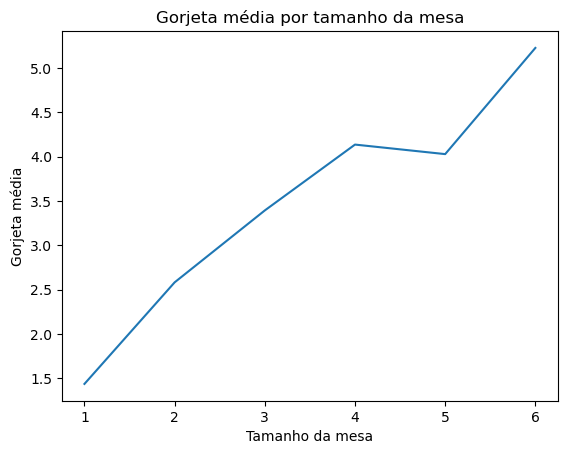

In [62]:
tip_por_tamanho = dados.groupby("size")["tip"].mean().reset_index()
sns.lineplot(data=tip_por_tamanho, x="size", y="tip")
plt.title("Gorjeta média por tamanho da mesa")
plt.xlabel("Tamanho da mesa")
plt.ylabel("Gorjeta média")
plt.show()

## Pairplot

**Quando usar:** explorar relações entre múltiplas variáveis numéricas.

**Função:** `sns.pairplot`

**Argumentos:**
- `data`: base de dados
- `hue`: variável categórica para colorir os pontos

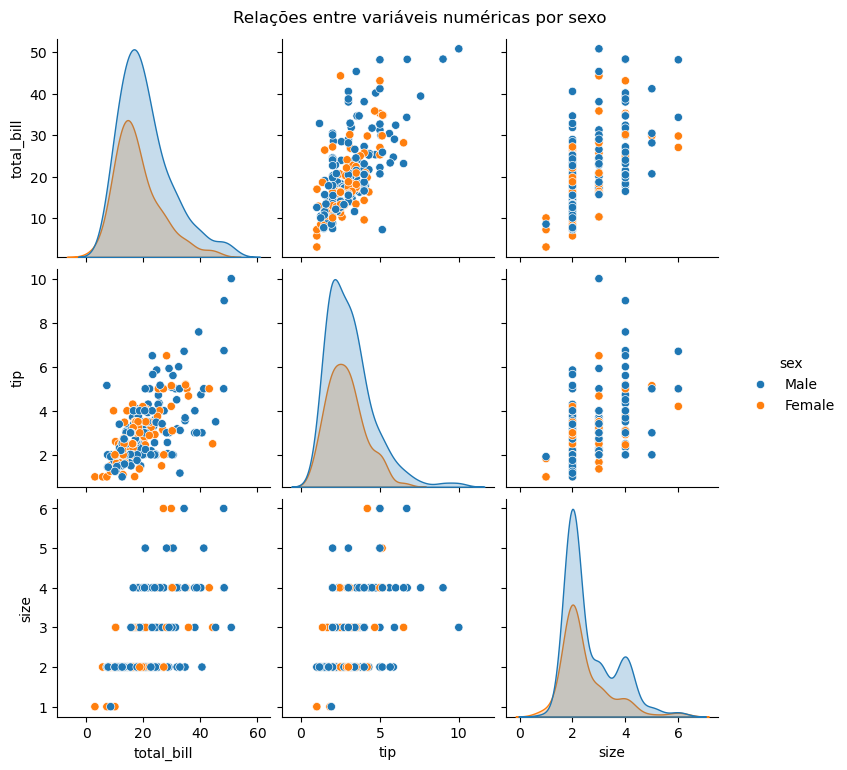

In [65]:
sns.pairplot(dados, hue="sex")
plt.suptitle("Relações entre variáveis numéricas por sexo", y=1.02)
plt.show()